In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
import numpy as np
import pandas as pd
import sqlite3
import datetime as dt

### Connect to the Hawaii Database

In [3]:
#connect
conn = sqlite3.connect("Resources/hawaii.sqlite")

In [4]:
#obtain a cursor - something to loop through via database connection
cur = conn.cursor()

In [5]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
#obtain data from cursor via loop - in this case - table names in database file
rows = cur.fetchall()
 
for row in rows:
    print(row)

('measurement',)
('station',)


In [6]:
#obtain details of the schema/table format from table named measurement
cur.execute("SELECT sql FROM sqlite_master WHERE name='measurement'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('CREATE TABLE measurement (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tdate TEXT, \n\tprcp FLOAT, \n\ttobs FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [7]:
#obtain details of the schema/table format from table named station
cur.execute("SELECT sql FROM sqlite_master WHERE name='station'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('CREATE TABLE station (\n\tid INTEGER NOT NULL, \n\tstation TEXT, \n\tname TEXT, \n\tlatitude FLOAT, \n\tlongitude FLOAT, \n\televation FLOAT, \n\tPRIMARY KEY (id)\n)',)


In [8]:
#view the list of columns in the measurement table
cur.execute("PRAGMA table_info(measurement)")
rows =  cur.fetchall()

for row in rows:
    print(row)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'date', 'TEXT', 0, None, 0)
(3, 'prcp', 'FLOAT', 0, None, 0)
(4, 'tobs', 'FLOAT', 0, None, 0)


In [9]:
#view
cur.execute("SELECT * from measurement limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [10]:
#view the list of columns in the station table
cur.execute("PRAGMA table_info(station)")
rows =  cur.fetchall()

for row in rows:
    print(row)

(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'latitude', 'FLOAT', 0, None, 0)
(4, 'longitude', 'FLOAT', 0, None, 0)
(5, 'elevation', 'FLOAT', 0, None, 0)


In [11]:
#view
cur.execute("SELECT * from station limit 10")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [12]:
#view total records
cur.execute("SELECT count(*) from station")
rows = cur.fetchall()
 
for row in rows:
    print(row)
    
#  measurement has 19,500 records
# station has 9 records

(9,)


## Step 1
### Section A - Precipitation Analysis
<BR>A1:  Design a query to retrieve the last 12 months of precipitation data.
<BR>A2:  Select only the date and prcp values.
<BR>A3:  Load the query results into a Pandas DataFrame and set the index to the date column.
<BR>A4:   Sort the DataFrame values by date.
<BR>A5:  Plot the results using the DataFrame plot method.
<BR>A6:  Use Pandas to print the summary statistics for the precipitation data.

In [51]:
#find the latest date in measurement

cur.execute("SELECT max(date) as maxDate from measurement")
rows = cur.fetchall()
 
for row in rows:
    maxDate = row[0]
    print(row)
    
#returns 2017-08-23

('2017-08-23',)


In [52]:
print(maxDate)

2017-08-23


maxDate = dt.datetime.strptime(maxDate, '%Y-%m-%d')
prev_year = maxDate - dt.timedelta(days=365)
prev_year

In [ ]:
# need to convert the prev_year to a string


In [82]:
print(prev_year)

2016-08-23 00:00:00


In [83]:
#  A1:  Design a query to retrieve the last 12 months of precipitation data.
#  A2:  Select only the date and prcp values.

#NOTE:    last date in measurement is 2017-08-23
#use this if the data were current:
#cur.execute("SELECT * from measurement where date >= date( julianday(date('now'))-365);")

#cur.execute("SELECT date, prcp from measurement where date >= '2016-08-23'")
cur.execute("SELECT date, prcp from measurement where date >= %s" % (prev_year.strftime('%m-%d-%Y'),))
rows = cur.fetchall()
 
for row in rows:
    print(row)
    
# ?? does not work.    prints 2010

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

In [16]:
#A3:  Load the query results into a Pandas DataFrame and set the index to the date column.  (Index set in upcoming step)
#A4:   Sort the DataFrame values by date.
lastYear = pd.read_sql("SELECT date, prcp from measurement where date >= '2016-08-24' order by date desc, prcp asc", conn)

In [17]:
lastYear.head(10)

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,NaN
8,2017-08-21,0.00
9,2017-08-21,0.02


In [18]:
#A3:  .... set the index to the date column. 
#saved as a new df in case I need lastYear where the index was not changed.
lastYear2 = lastYear.set_index('date')

In [19]:
#manual check
lastYear2.head()

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


Text(0, 0.5, 'Precipitation (inches)')

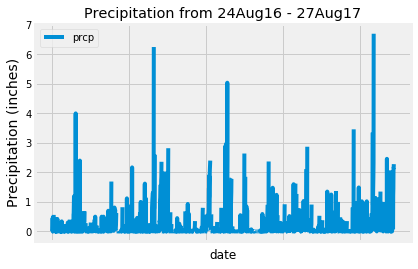

In [20]:
#  A5:  Plot the results using the DataFrame plot method.
lastYear2.plot()
plt.title("Precipitation from 24Aug16 - 27Aug17")
plt.ylabel('Precipitation (inches)', fontsize=14)

In [21]:
#A5:  EXTRA.  Create the graph using plot (opposed to the dataframe plot function)

In [22]:
# Create an array that contains the number of users each language has
precip = lastYear["prcp"]
#x_axis = np.arange(len(precip))
x_axis = lastYear["date"]

Text(0, 0.5, 'Precipitation (inches)')

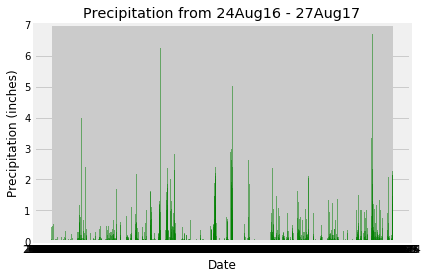

In [23]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, precip, color='g', alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Precipitation from 24Aug16 - 27Aug17")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")

In [24]:
#A6:  Use Pandas to print the summary statistics for the precipitation data.
summary = lastYear2["prcp"].describe()

In [25]:
summary.head(20)
#??  answer key shows the summary statistics in a dataframe.  How do I get them in a dataframe?

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

## Step 1
### Section B:   Station Analysis
B1 - Design a query to calculate the total number of stations.
<BR>
B2- Design a query to find the most active stations.
<BR>
-- B2a:  List the stations and observation counts in descending order.
<BR>
--  B2b:   Which station has the highest number of observations?
<BR>Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

<BR>
B3.  Design a query to retrieve the last 12 months of temperature observation data (tobs).
<BR>
--  B3a.  Filter by the station with the highest number of observations.
--  B3b.   Plot the results as a histogram with bins=12.

In [26]:
#B1.   Design a query to calculate the total number of stations.
cur.execute("SELECT count(distinct(station)) FROM station")
rows = cur.fetchall()
 
for row in rows:
    print(row)

(9,)


In [ ]:
#view all records, manual check
cur.execute("SELECT * FROM measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)

In [28]:
#B2:   What are the most active stations? (i.e. what stations have the most rows)?
#B2a: List the stations and observation counts in descending order. 

cur.execute("SELECT s.station, s.name, count(m.station) from station as s inner join measurement as m on s.station = m.station group by s.station order by count(m.station) desc")
rows = cur.fetchall()
 
for row in rows:
    print(row)


('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979)
('USC00517948', 'PEARL CITY, HI US', 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)


In [29]:
#For easier viewing, create a dataframe
stationActive = pd.read_sql("SELECT s.station as stationID, s.name as stationName, count(m.station) as activityCount from station as s inner join measurement as m on s.station = m.station group by s.station order by count(m.station) desc", conn)
stationActive.head(10)

,stationID,stationName,activityCount
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [30]:
#B2b: Which station has the highest number of observations? 
#EXAMPLE 1:  same as query in B2a, but limit results to 1

cur.execute("SELECT s.station, s.name, count(m.station) from station as s inner join measurement as m on s.station = m.station group by s.station order by count(m.station) desc limit 1")
rows = cur.fetchall()
 
for row in rows:
    print(row)


('USC00519281', 'WAIHEE 837.5, HI US', 2772)


In [31]:
stationActive.columns

Index(['stationID', 'stationName', 'activityCount'], dtype='object')

In [32]:
#B2b: Which station has the highest number of observations? 
#EXAMPLE 2:  pandas - since table is sorted in descending order, choose index 0.
#This is the station with the highest obs

highObs = stationActive.iloc[0]['stationID']
print(highObs)

USC00519281


In [33]:
#B2b: Which station has the highest number of observations? 
#EXAMPLE 3:  use max function

#https://stackoverflow.com/questions/25977977/sqlite-aggregate-maxsum-error-in-android
# https://stackoverflow.com/questions/9244378/how-to-maxcountx-in-sqlite
# ??  not able to make this work using the max function on an aggregate of sum


In [34]:
#manual check.  find the most recent date
cur.execute("select max(date) as maxDate from measurement")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('2017-08-23',)


In [35]:
#Self Tutorial - 
#how to add/subtract dates to a date using sqlite
cur.execute("SELECT date('now','-10 day')")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('2019-04-18',)


In [ ]:
import datetime as dt
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [44]:
# cur.execute("SELECT date, tobs from measurement where date >= ((select max(date) from measurement), '-365 day')")
# Jing offered sqlalchemy has a solution for subtracting from the date
#???  how do I subtract 365 days from the max(date)??
cur.execute("SELECT date, tobs from measurement where date >= (select max(date) from measurement as maxDate)")
rows = cur.fetchall()
 
for row in rows:
    print(row)

('2017-08-23', 81.0)
('2017-08-23', 82.0)
('2017-08-23', 82.0)
('2017-08-23', 76.0)


In [45]:
print(maxDate)

NameError: name 'maxDate' is not defined

#lorie Tutorial
cur.execute("SELECT date as maxDate, tobs from measurement where date >= (max(date), '+7 day')")
rows = cur.fetchall()
 
for row in rows:
    print(row)

In [ ]:
# B3.  Design a query to retrieve the last 12 months of temperature observation data (tobs).
#NOTE:    last date in measurement is 2017-08-23
#use this if the data were current:
# cur.execute("SELECT * from measurement where date >= date( julianday(date('now'))-365);")

cur.execute("SELECT date, tobs from measurement where date >= '2016-08-24'")
rows = cur.fetchall()
 
for row in rows:
    print(row)

In [37]:
#add to a dataframe for ease of work
tempObs = pd.read_sql("SELECT id, station, date, tobs from measurement where date >= '2016-08-24'", conn)
tempObs.head(10)


,id,station,date,tobs
0,2365,USC00519397,2016-08-24,79.0
1,2366,USC00519397,2016-08-25,80.0
2,2367,USC00519397,2016-08-26,79.0
3,2368,USC00519397,2016-08-27,77.0
4,2369,USC00519397,2016-08-28,78.0
5,2370,USC00519397,2016-08-29,78.0
6,2371,USC00519397,2016-08-30,79.0
7,2372,USC00519397,2016-08-31,80.0
8,2373,USC00519397,2016-09-01,81.0
9,2374,USC00519397,2016-09-02,80.0


In [38]:
#B3a.  Filter by the station with the highest number of observations.
#Use pandas
tempObs2 = tempObs[tempObs['station']==highObs]
tempObs2.head()


,id,station,date,tobs
1524,14609,USC00519281,2016-08-24,77.0
1525,14610,USC00519281,2016-08-25,80.0
1526,14611,USC00519281,2016-08-26,80.0
1527,14612,USC00519281,2016-08-27,75.0
1528,14613,USC00519281,2016-08-28,73.0


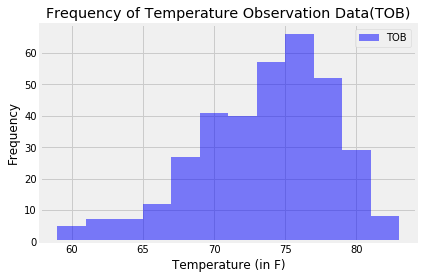

In [39]:
#B3b.   Plot the results as a histogram with bins=12.
#NOTE:  added an additional import: import matplotlib.mlab as mlab

#create histogram
x = tempObs2['tobs']
num_bins = 12
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, label = 'TOB')

#add labels
plt.xlabel('Temperature (in F)')
plt.ylabel('Frequency')
plt.title('Frequency of Temperature Observation Data(TOB)')

plt.legend(loc='upper right')
plt.show()



In [40]:
### End Step 1
### Begin Step 2

## Step 2 - Climate App

Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
<BR>Use FLASK to create your routes.

In [41]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
